In [1]:
import os
from os.path import isdir, join
from pathlib import Path

#Scientific Library
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from scipy.misc import imread

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
    
%matplotlib inline

10 classes from the list : 
yes, no, up, down, left, right, on, off, stop, go

2 classes below :
1. 6 pictures from silence
2. everything else to unknown

Take 400 pictures from each class above - 4000 total
and from the rest of 20 classes, take 20 pictures from each - 400 pictures for unknown

Possible Data Augmentation on 6 pictures for silence

-> for now, total of 4000 + 400 + 6 = 4406 pictures.
Everything in order.

In [2]:
cat = os.listdir('../input/audio/cat')
down = os.listdir('../input/audio/down')
four = os.listdir('../input/audio/four')
house = os.listdir('../input/audio/house')
nine = os.listdir('../input/audio/nine')
on = os.listdir('../input/audio/on')
seven = os.listdir('../input/audio/seven')
stop = os.listdir('../input/audio/stop')
two = os.listdir('../input/audio/two')
yes = os.listdir('../input/audio/yes')
bed = os.listdir('../input/audio/bed')
eight = os.listdir('../input/audio/eight')
go = os.listdir('../input/audio/go')
left = os.listdir('../input/audio/left')
no = os.listdir('../input/audio/no')
one = os.listdir('../input/audio/one')
sheila = os.listdir('../input/audio/sheila')
three = os.listdir('../input/audio/three')
up = os.listdir('../input/audio/up')
zero = os.listdir('../input/audio/zero')
bird = os.listdir('../input/audio/bird')
dog = os.listdir('../input/audio/dog')
five = os.listdir('../input/audio/five')
happy = os.listdir('../input/audio/happy')
marvin = os.listdir('../input/audio/marvin')
off = os.listdir('../input/audio/off')
right = os.listdir('../input/audio/right')
six = os.listdir('../input/audio/six')
tree = os.listdir('../input/audio/tree')
wow = os.listdir('../input/audio/wow')
silence = os.listdir('../input/audio/silence')

In [3]:
print(len(yes))

2377


by doing ls -R | wc -l, found out there are total of 64823 spectrogram. We will put in 100 from each first.

In [4]:
#no[2]

In [5]:
#data = np.empty((100,129,256), dtype=np.float32)

In [6]:
#index=0
#image_name_list = sheila
#for image_name in image_name_list[:100]:
#    imageA = plt.imread('../input/audio/sheila/' + image_name)
#    data[index] = imageA
#    index+=1

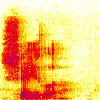

In [7]:
from PIL import Image
a=Image.open('../input/audio/sheila/' + sheila[9]).resize((100,100))
a

In [8]:
#Convert Yes Spectrogram Images to Pixels

data = np.empty((4400,100,100), dtype=np.float32)

# top 10

index = 0
image_name_list = yes
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/yes/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = no
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/no/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
        
image_name_list = up
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/up/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = down
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/down/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = left
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/left/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = right
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/right/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = on
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/on/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = off
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/off/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = stop
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/stop/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = go
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/go/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
# Top 10 done

# Silence 400 pictures
"""    
image_name_list = silence
for image_name in image_name_list:
    imageA = Image.open('../input/audio/silence/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1    
"""

# Unknown : 20 pictures from the rest
    
image_name_list = cat
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/cat/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
     
image_name_list = four
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/four/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = house
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/house/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = nine
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/nine/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = seven
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/seven/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = two
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/two/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1

image_name_list = bed
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bed/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = eight
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/eight/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = one
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/one/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = sheila
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/sheila/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = three
for image_name in image_name_list[:20]:
    imageA = plt.imread('../input/audio/three/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = zero
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/zero/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = bird
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bird/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = dog
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/dog/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = five
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/five/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = happy
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/happy/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = marvin
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/marvin/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1 
    
image_name_list = six
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/six/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = tree
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/tree/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1
    
image_name_list = wow
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/wow/' + image_name).resize((100,100))
    data[index] = imageA
    index+=1

In [9]:
# 4800 data sets with 30 classes and 100 spectrograms in each class
data.shape

(4400, 100, 100)

In [10]:
# check if the end is not empty meaning that 3000 has all been transferred
data[-1]

array([[  4.,   4.,   4., ...,  16.,   4.,   4.],
       [  5.,   4.,   4., ...,   4.,   8.,   4.],
       [  4.,   4.,   4., ...,  20.,   5.,  14.],
       ...,
       [ 78.,  84.,  52., ...,  46.,  81.,  82.],
       [129., 126., 134., ..., 125., 127., 135.],
       [137., 140., 145., ..., 134., 139., 145.]], dtype=float32)

In [11]:
data = data/255

(100, 100)


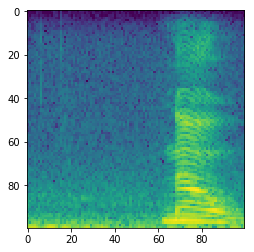

In [12]:
#show one image
plt.imshow(data[456])
print(data[456].shape)

In [13]:
# Flatten
# 50, 50 -> 2500
#single_image = data[0].flatten()

In [14]:
#single_image.shape

In [15]:
#new_image = single_image.reshape(129, 256, 3)

In [16]:
#random_df = pd.DataFrame(single_image)

In [17]:
#random_df = random_df.T

In [18]:
#random_df[-1] = [0]

In [19]:
#random_df

In [20]:
#data = data/255

In [21]:
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

min of pixel : 0.015686275
max of pixel : 0.7647059


In [22]:
"""
#concatenate all the flattened spectrograms in order
fl_data = np.empty((4800,2500), dtype=np.float32)

for i in range(len(data)):
    flat = data[i].flatten()
    fl_data[i] = flat
"""

'\n#concatenate all the flattened spectrograms in order\nfl_data = np.empty((4800,2500), dtype=np.float32)\n\nfor i in range(len(data)):\n    flat = data[i].flatten()\n    fl_data[i] = flat\n'

In [23]:
"""
# check if transferred all
print("size : " + str(fl_data.shape))
print(fl_data[-1])
"""

'\n# check if transferred all\nprint("size : " + str(fl_data.shape))\nprint(fl_data[-1])\n'

In [24]:
#for i in range(30):
#    print(i % 10)

In [25]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [26]:
# create labels
label = np.zeros((400,), dtype=int)

for i in range(1, 11):
    label = np.concatenate((label, np.repeat(i, 400)))

In [27]:
# check uniques
unique(label)

0
1
2
3
4
5
6
7
8
9
10


In [28]:
print(label.shape)
print(type(label[0]))

(4400,)
<class 'numpy.int64'>


In [29]:
#label = label.reshape((4800,1))

In [30]:
#type(np.float64(label[0][0]))

In [31]:
label.shape

(4400,)

In [32]:
#fl_data.shape

In [33]:
"""
#one hot encode the lable
b = np.zeros((label.size, label.max()+1))
b[np.arange(label.size), label] = 1
#labels = b
"""

'\n#one hot encode the lable\nb = np.zeros((label.size, label.max()+1))\nb[np.arange(label.size), label] = 1\n#labels = b\n'

### check on prepared datasets

In [34]:
"""
print(fl_data.shape)
print(labels.shape)
"""

'\nprint(fl_data.shape)\nprint(labels.shape)\n'

### Before dividing into train and test sets, let's combine so we can shuffle

In [35]:
#a=np.concatenate((fl_data, label), axis=1)
#a.shape

In [36]:
#shuffle
#np.random.shuffle(a)

In [37]:
#how to slice the labels again
#new_labels=a[:,-1:]#.sum()
#new_labels.shape

In [38]:
#how to slice the train again
#train_data=a[:,:2500]
#train_data.shape

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3520, 100, 100), (880, 100, 100), (3520,), (880,))

In [40]:
"""
x_train = train_data[:4000]
print("train : " + str(x_train.shape))
x_val = train_data[4000:]
print("train validation : " + str(x_val.shape))
y_train = new_labels[:4000]
y_train = np.int64(y_train)
print("train label : " + str(y_train.shape))
y_val = new_labels[4000:]
y_val = np.int64(y_val)
print("train validation label : " + str(y_val.shape))
"""

'\nx_train = train_data[:4000]\nprint("train : " + str(x_train.shape))\nx_val = train_data[4000:]\nprint("train validation : " + str(x_val.shape))\ny_train = new_labels[:4000]\ny_train = np.int64(y_train)\nprint("train label : " + str(y_train.shape))\ny_val = new_labels[4000:]\ny_val = np.int64(y_val)\nprint("train validation label : " + str(y_val.shape))\n'

In [41]:
"""
#change data types to df
x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
"""

'\n#change data types to df\nx_train = pd.DataFrame(x_train)\nx_val = pd.DataFrame(x_val)\ny_train = pd.DataFrame(y_train)\ny_val = pd.DataFrame(y_val)\n'

In [42]:
print(type(x_train[0][0][0]))
y_train = np.int32(y_train)
print(type(y_train[0]))
print(type(x_val[0][0][0]))
y_val = np.int32(y_val)
print(type(y_val[0]))

<class 'numpy.float32'>
<class 'numpy.int32'>
<class 'numpy.float32'>
<class 'numpy.int32'>


In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(3520, 100, 100)
(3520,)
(880, 100, 100)
(880,)


## CNN Helper f(x)

In [44]:
import tensorflow as tf
'''
x - according to the documentation I am passing a dictionary of my training features
y - passing the training labels
batch_size - how many images I want to pass to my NN in a single training step. 
             The gradients and the loss for the training step will be calculated only on these images. 
num_epochs - when I want to complete the execution of this method. With the current setting (1) 
             when the input function goes through all images once it will complete.
shuffle    - do I want to read the images in order or no. It is a better strategy to 
             shuffle within the training images during training.
'''
train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={'x':x_train},
      y=y_train,
      batch_size=10,
      num_epochs=1,
      shuffle=True)

'''
What the eval_input_fn will do with its current settings is to read the entire training dataset 
(in order) using batch_size of 128 (default setting). 

Keep in mind that it will also terminate when completes 1 epoch.
'''
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':x_val},
    y=y_val,
    shuffle=False,
    num_epochs=1)

## Model

In [45]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 100, 100, 1])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=10,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
    
    bconv1 = tf.layers.batch_normalization(conv1)
  # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=bconv1, pool_size=[2, 2], strides=2)
    bpool1 = tf.layers.batch_normalization(pool1)
  # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
      inputs=bpool1,
      filters=20,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

    bconv2 = tf.layers.batch_normalization(conv2)
    pool2 = tf.layers.max_pooling2d(inputs=bconv2, pool_size=[2, 2], strides=2)
    bpool2 = tf.layers.batch_normalization(pool2)
  # Dense Layer
    pool2_flat = tf.reshape(bpool2, [-1, 125000])
    dense = tf.layers.dense(inputs=pool2_flat, units=100, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
    
    logits = tf.layers.dense(inputs=dropout, units=11)

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [46]:
tf.logging.set_verbosity(tf.logging.INFO)

In [47]:
# first we define a folder where tensorflow will keep its progress
# this includes periodical saves of our weight, biases, accuracy, loss and etc.
# so if we have more training images we can simply continue training on them
OUTDIR = './CNN_CLASSIFIER'

# we create an estimator object which:
# - is using the Neural Net structure from the cnn_model_function
# - reads/writes the files written in the directory which we defined earlier
cnn_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir=OUTDIR)

# here we start the FileWriter method which will actually save the progress in the folder defined above
file_writer = tf.summary.FileWriter(OUTDIR)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './CNN_CLASSIFIER', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc11df93c18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
# a small helper function which trains/evaluates our network for a given number of epochs
# remember that our input functions go through the datasets only once
def train_and_evaluate(estimator, epochs=1):
    for i in range(epochs):
        estimator.train(input_fn=train_input_fn, steps=1)
        estimator.evaluate(input_fn=eval_input_fn)

# and here we finally start training/evaluating the NN for 30 epochs
train_and_evaluate(cnn_classifier)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./CNN_CLASSIFIER/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into ./CNN_CLASSIFIER/model.ckpt.


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [1,11] and labels shape [10]
	 [[{{node sparse_softmax_cross_entropy_loss/xentropy/xentropy}} = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_1/BiasAdd, random_shuffle_queue_DequeueUpTo:2)]]

Caused by op 'sparse_softmax_cross_entropy_loss/xentropy/xentropy', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3189, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-28db5fa959fb>", line 9, in <module>
    train_and_evaluate(cnn_classifier)
  File "<ipython-input-48-28db5fa959fb>", line 5, in train_and_evaluate
    estimator.train(input_fn=train_input_fn, steps=1)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 356, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 1181, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 1211, in _train_model_default
    features, labels, model_fn_lib.ModeKeys.TRAIN, self.config)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 1169, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "<ipython-input-45-9796c4223df0>", line 51, in cnn_model_fn
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py", line 915, in sparse_softmax_cross_entropy
    name="xentropy")
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_ops.py", line 2073, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_nn_ops.py", line 7520, in sparse_softmax_cross_entropy_with_logits
    labels=labels, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): logits and labels must have the same first dimension, got logits shape [1,11] and labels shape [10]
	 [[{{node sparse_softmax_cross_entropy_loss/xentropy/xentropy}} = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_1/BiasAdd, random_shuffle_queue_DequeueUpTo:2)]]


# PREDS

In [ ]:
#test_data = np.empty((158538,50,50), dtype=np.float32)
test_data = np.empty((1000,28,28), dtype=np.float32)

In [ ]:
test = os.listdir('../input/audio_test/')

In [ ]:
index = 0
image_name_list = test
for image_name in image_name_list[:1000]:
    imageA = Image.open('../input/audio_test/' + image_name).resize((28,28))
    test_data[index] = imageA
    index+=1
    if index%1000==0:
        print(index)

In [ ]:
fl_test_data = np.empty((1000,28*28), dtype=np.float32)

for i in range(len(test_data)):
    flat = test_data[i].flatten()
    fl_test_data[i] = flat

In [ ]:
fl_test_data.shape

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x':fl_test_data},
    shuffle=False,
    num_epochs=2)

In [ ]:
generator = cnn_classifier.predict(input_fn=predict_input_fn)

In [ ]:
preds = []
b = []
for i in range(1000):
    a = next(generator)
    preds.append(a['classes'])
    b.append(i)

In [ ]:
unique(preds)